# Logistic Regression

## Part 1 - Data Preprocessing

### Importing the dataset

In [47]:
import pandas as pd

# For preprocessing the data: Label Encoding and Standard Scaling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# For building models
from sklearn.linear_model import LogisticRegression

# For evaluating Models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

dataset = pd.read_csv('HR-Employee-Attrition.csv')
dataset.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


### Data Reduction

In [48]:
dataset.drop(columns = ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

### Data Analysis

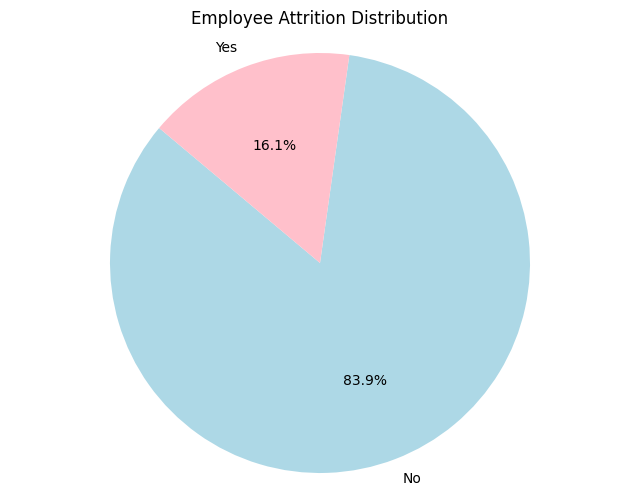

In [49]:
import matplotlib.pyplot as plt
attrition_counts = dataset['Attrition'].value_counts()

plt.figure (figsize = (8, 6))
plt.pie (attrition_counts, labels = attrition_counts.index, autopct = '%1.1f%%', startangle = 140, colors = ['lightblue', 'pink'])
plt.title('Employee Attrition Distribution')
plt.axis('equal')
plt.show()

### Feature Engineering

In [50]:
dataset['WorkExperience'] = dataset[['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
                                'YearsSinceLastPromotion', 'YearsWithCurrManager']].mean(axis = 1)

In [51]:
dataset['OverallSatisfaction'] = (
    dataset[['JobSatisfaction' , 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']].mean(axis = 1)
)

In [52]:
dataset = dataset.drop(['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
            'YearsSinceLastPromotion', 'JobSatisfaction' , 'EnvironmentSatisfaction',
            'RelationshipSatisfaction', 'WorkLifeBalance'],axis = 1)

### Categorical Encoding

In [53]:
cat_cols = dataset.select_dtypes(include = ['object'])

In [54]:
label_encoder = LabelEncoder()
categorical_cols = cat_cols
for col in categorical_cols:
    dataset[col] = label_encoder.fit_transform(dataset[col])

dataset.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Gender,HourlyRate,...,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TrainingTimesLastYear,YearsWithCurrManager,WorkExperience,OverallSatisfaction
0,41,1,2,1102,2,1,2,1,0,94,...,19479,8,1,11,3,0,0,5,4.6,2.00
1,49,0,1,279,1,8,1,1,1,61,...,24907,1,0,23,4,1,3,7,7.0,3.00
2,37,1,2,1373,1,2,2,4,1,92,...,2396,6,1,15,3,0,3,0,1.4,3.00
3,33,0,1,1392,1,3,4,1,0,56,...,23159,1,1,11,3,0,3,0,5.2,3.25
4,27,0,2,591,1,2,1,3,1,40,...,16632,9,0,12,3,1,3,2,2.8,2.50
5,32,0,1,1005,1,2,2,1,1,79,...,11864,0,0,13,3,0,2,6,6.2,3.25
6,59,0,2,1324,1,3,3,3,0,81,...,9964,4,1,20,4,3,3,0,2.6,1.75
7,30,0,2,1358,1,24,1,1,1,67,...,13335,1,0,22,4,1,2,0,0.4,3.00
8,38,0,1,216,1,23,3,1,1,44,...,8787,0,0,21,4,0,2,8,7.0,3.00
9,36,0,2,1299,1,27,3,3,1,94,...,16577,6,0,13,3,2,3,7,9.0,2.50


In [55]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',
       'TrainingTimesLastYear', 'YearsWithCurrManager', 'WorkExperience',
       'OverallSatisfaction'],
      dtype='object')

### Getting the inputs and output

In [56]:
X = dataset.drop('Attrition', axis = 1)  
y = dataset['Attrition']  

In [57]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Gender,HourlyRate,JobInvolvement,...,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TrainingTimesLastYear,YearsWithCurrManager,WorkExperience,OverallSatisfaction
0,41,2,1102,2,1,2,1,0,94,3,...,19479,8,1,11,3,0,0,5,4.6,2.00
1,49,1,279,1,8,1,1,1,61,2,...,24907,1,0,23,4,1,3,7,7.0,3.00
2,37,2,1373,1,2,2,4,1,92,2,...,2396,6,1,15,3,0,3,0,1.4,3.00
3,33,1,1392,1,3,4,1,0,56,3,...,23159,1,1,11,3,0,3,0,5.2,3.25
4,27,2,591,1,2,1,3,1,40,3,...,16632,9,0,12,3,1,3,2,2.8,2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,1,41,4,...,12290,4,0,17,3,1,3,3,5.4,3.25
1466,39,2,613,1,6,1,3,1,42,2,...,21457,4,0,15,3,1,5,7,6.2,2.25
1467,27,2,155,1,4,3,1,1,87,4,...,5174,1,1,20,4,1,0,3,3.4,2.25
1468,49,1,1023,2,2,3,3,1,63,2,...,13243,2,0,14,3,0,3,8,8.0,3.00


In [58]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

### Creating the Training Set and the Test Set

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [60]:
X_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Gender,HourlyRate,JobInvolvement,...,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TrainingTimesLastYear,YearsWithCurrManager,WorkExperience,OverallSatisfaction
1374,58,2,605,2,21,3,1,0,72,3,...,11761,4,1,13,3,1,2,0,6.0,3.25
1092,45,2,950,1,28,3,5,1,97,3,...,4585,4,0,20,4,1,3,3,4.0,3.75
768,40,2,300,2,26,3,2,1,74,3,...,22217,1,0,14,3,1,3,5,6.8,2.00
569,36,0,1434,2,8,4,1,1,76,2,...,14229,1,0,15,3,0,1,9,7.2,1.75
911,25,1,599,2,24,1,1,1,73,1,...,8040,1,1,14,3,0,4,0,0.6,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,34,2,1333,2,10,4,1,0,87,3,...,18410,1,1,19,3,1,2,0,0.6,3.25
835,35,2,528,0,8,4,5,1,100,3,...,7108,1,0,17,3,0,2,4,4.0,2.25
1216,43,2,1179,2,2,3,3,1,73,3,...,6069,1,1,17,3,1,3,8,9.0,3.00
559,38,2,268,1,2,5,3,1,92,3,...,20471,6,1,13,3,1,0,1,1.6,2.50


In [61]:
X_test

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Gender,HourlyRate,JobInvolvement,...,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TrainingTimesLastYear,YearsWithCurrManager,WorkExperience,OverallSatisfaction
442,36,0,635,2,10,4,3,1,32,3,...,15318,1,0,14,3,0,3,7,7.8,3.00
1091,33,2,575,1,25,3,1,1,44,2,...,24152,1,0,13,3,0,2,2,3.0,3.25
981,35,1,662,2,18,4,2,0,67,3,...,23288,0,1,18,3,1,0,2,3.2,3.00
785,40,2,1492,1,20,4,5,1,61,3,...,26542,4,0,20,4,1,6,1,9.4,3.00
1332,29,1,459,1,24,2,1,1,73,2,...,14753,1,1,24,4,0,3,0,0.6,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,36,2,557,2,3,3,3,0,94,2,...,12695,0,0,19,3,2,2,4,6.6,2.75
481,34,2,254,1,1,2,1,1,83,2,...,22794,1,1,13,3,1,3,3,4.2,3.25
124,31,2,249,2,6,4,1,1,76,1,...,20739,4,1,18,3,0,3,7,8.0,2.25
198,38,2,1261,1,2,4,1,1,88,3,...,7259,9,0,14,3,0,3,0,3.0,3.00


In [62]:
y_train

1374    0
1092    0
768     0
569     0
911     1
       ..
763     0
835     0
1216    0
559     0
684     0
Name: Attrition, Length: 1176, dtype: int64

In [63]:
y_test

442     0
1091    0
981     1
785     0
1332    1
       ..
1439    0
481     0
124     1
198     0
1229    0
Name: Attrition, Length: 294, dtype: int64

### Feature Scaling

In [64]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [65]:
X_train

array([[ 2.3389367 ,  0.595307  , -0.48557354, ..., -1.15043886,
         0.07000596,  1.00675539],
       [ 0.9043263 ,  0.595307  ,  0.36465323, ..., -0.3083749 ,
        -0.43076658,  1.99502279],
       [ 0.35255307,  0.595307  , -1.23722329, ...,  0.25300108,
         0.27031497, -1.4639131 ],
       ...,
       [ 0.68361701,  0.595307  ,  0.92900666, ...,  1.09506504,
         0.82116476,  0.51262169],
       [ 0.13184377,  0.595307  , -1.31608491, ..., -0.86975087,
        -1.03169363, -0.4756457 ],
       [ 0.35255307,  0.595307  , -0.35495899, ..., -1.15043886,
        -0.83138461, -1.9580468 ]])

## Part 2 - Building and training the model

### Building the model

In [66]:
model = LogisticRegression(random_state = 0)

### Training the model

In [67]:
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Inference

Making the predictons of the data points in the test set

In [68]:
y_pred = model.predict(X_train)

In [69]:
y_pred = model.predict(X_test)

In [70]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0])

Making the prediction of a single data point with:

1. Age = 1
2.  Business Travel = 1
3. Daily Rate = 1
4. Department = 1
5. Distance = 1
6. Education = 1
7. Education Field = 1
8. Gender = 1
9. Hourly Rate = 1
10. Job Involvement = 1
11. Job Level = 1
12. Job Role = 1
13. Marital Status = 1
14. Monthly Income = 1
15. Monthly Rate = 1
16. Num Companies Worked = 1
17. Overtime = 1
18. Percent Salary Hike = 1
19. Performance Rating = 1
20. Stock Option = 1
21. Training Time Last Year = 1
22. Years With Current Manager = 1
23. Work Experience = 1

In [71]:
model.predict(sc.transform([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

## Part 3: Evaluating the model 

### Confusion Matrix

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[241,   4],
       [ 32,  17]])

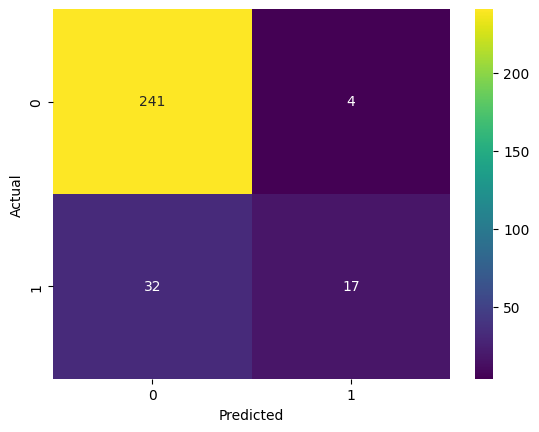

In [79]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap = 'viridis', annot = True, fmt = '.0f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Accuracy

In [76]:
(241+17)/(241+17+4+32)

0.8775510204081632

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8775510204081632